In [2]:
# Tensors are similar to arrays
# but are more efficient in processing
# high dimensional data
# Reference site: https://www.dataquest.io/blog/pytorch-for-beginners/
import torch
import numpy as np

ndarray = np.array([0, 1, 2])
print(ndarray.shape)
# 1-D tensor (D denote dimensional)
t = torch.from_numpy(ndarray)
print(t)

(3,)
tensor([0, 1, 2])


In [3]:
# Attributes of tensors
print(t.shape)
print(t.dtype)
print(t.device)

torch.Size([3])
torch.int64
cpu


In [4]:
# multi-dimensional tensors
ndarray = np.array([[0, 1, 2], [3, 4, 5]])
t = torch.from_numpy(ndarray)
print(t)
print(t.shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [5]:
# create a tensor based on a previously defined tensors
# the below tensor creates a tensor similar to t, but with random values
x = [1 for i in range(10)]
print(x)
new_t = torch.rand_like(t, dtype=torch.float)
print(new_t)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tensor([[0.7477, 0.6545, 0.6318],
        [0.5629, 0.0373, 0.4082]])


In [6]:
# create a tensor with random values with a given shape
my_shape = (2, 3)
rand_t = torch.rand(my_shape)
print(rand_t)

tensor([[0.7225, 0.6958, 0.4193],
        [0.7309, 0.2729, 0.3621]])


In [7]:
# tensor operations

In [8]:
# create a tensor with zero initialization
zeros_tensor = torch.zeros((2, 3))
print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
# accessing the values
print(zeros_tensor[1])
# the above accesses a row
print(zeros_tensor[:, 0])
# the above accesses a column

tensor([0., 0., 0.])
tensor([0., 0.])


In [10]:
# transpose a tensor
transposed = zeros_tensor.T
print(transposed)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [11]:
# tensors with initialization to 1
ones_tensor = torch.ones(3, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
# multiplication of two tensors
product = torch.matmul(rand_t, ones_tensor)

print(product)

tensor([[1.8377, 1.8377, 1.8377],
        [1.3659, 1.3659, 1.3659]])


In [13]:
# let us start with basic data loading
# now the fun begins
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 27.4MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.82MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.05MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [14]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
# Access the 1st element
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

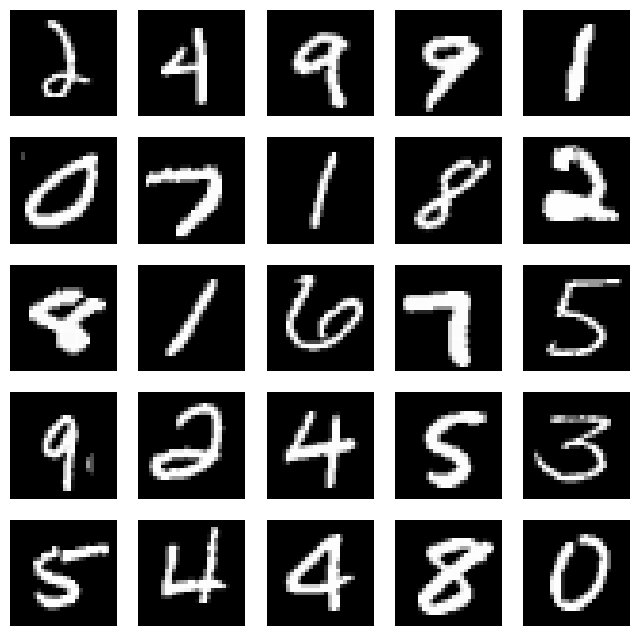

In [16]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [17]:
# total number of labels/classes in the training data
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [18]:
# use a DataLoader which enables you to train a neural network using minibatches
# we usually shuffle the data to eliminate any existing bias related to some classes
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

In [19]:
# let us desing our first neural network
from torch import nn

class NeuralNetwork(nn.Module):
  # this initializes the neural network, defines its architecture
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
  # the forward function defines the forward pass
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [20]:
# let us create an instance for our neural network class
model = NeuralNetwork()
print(model)
# the model architecure is printed

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [21]:
# define the loss function
# we are using a Cross Entropy Loss as it is a classification task
loss_function = nn.CrossEntropyLoss()

In [22]:
# define the optimizer
# we are using an SGD optimizer or Stochastic Gradient Descent Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# lr denotes the learning rate

In [23]:
# let us write the code for training
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [24]:
# predicting and evaluating your model
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [25]:
# run the functions
# epochs are nothing but passing all your data through the defined neural network
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301842  [   64/60000]
loss: 2.300991  [  128/60000]
loss: 2.294285  [  192/60000]
loss: 2.295765  [  256/60000]
loss: 2.298403  [  320/60000]
loss: 2.295790  [  384/60000]
loss: 2.294276  [  448/60000]
loss: 2.298121  [  512/60000]
loss: 2.311823  [  576/60000]
loss: 2.302514  [  640/60000]
loss: 2.299244  [  704/60000]
loss: 2.306930  [  768/60000]
loss: 2.291266  [  832/60000]
loss: 2.309752  [  896/60000]
loss: 2.296632  [  960/60000]
loss: 2.293458  [ 1024/60000]
loss: 2.301733  [ 1088/60000]
loss: 2.299612  [ 1152/60000]
loss: 2.295380  [ 1216/60000]
loss: 2.297441  [ 1280/60000]
loss: 2.297564  [ 1344/60000]
loss: 2.308183  [ 1408/60000]
loss: 2.299996  [ 1472/60000]
loss: 2.296065  [ 1536/60000]
loss: 2.300629  [ 1600/60000]
loss: 2.300186  [ 1664/60000]
loss: 2.302971  [ 1728/60000]
loss: 2.284673  [ 1792/60000]
loss: 2.292442  [ 1856/60000]
loss: 2.297835  [ 1920/60000]
loss: 2.299662  [ 1984/60000]
loss: 2.293282  [ 2048/60000]


In [ ]:
# increasing the number of epochs will increase the test accuracy
# the weights will be better refined
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 1.475280  [   64/60000]
loss: 1.432509  [  128/60000]
loss: 1.391924  [  192/60000]
loss: 1.390188  [  256/60000]
loss: 1.422534  [  320/60000]
loss: 1.538719  [  384/60000]
loss: 1.496370  [  448/60000]
loss: 1.452033  [  512/60000]
loss: 1.413204  [  576/60000]
loss: 1.472225  [  640/60000]
loss: 1.456702  [  704/60000]
loss: 1.441183  [  768/60000]
loss: 1.615815  [  832/60000]
loss: 1.431956  [  896/60000]
loss: 1.500449  [  960/60000]
loss: 1.458188  [ 1024/60000]
loss: 1.466388  [ 1088/60000]
loss: 1.380619  [ 1152/60000]
loss: 1.522281  [ 1216/60000]
loss: 1.499873  [ 1280/60000]
loss: 1.531964  [ 1344/60000]
loss: 1.493607  [ 1408/60000]
loss: 1.482932  [ 1472/60000]
loss: 1.548446  [ 1536/60000]
loss: 1.477039  [ 1600/60000]
loss: 1.444078  [ 1664/60000]
loss: 1.478999  [ 1728/60000]
loss: 1.497083  [ 1792/60000]
loss: 1.513892  [ 1856/60000]
loss: 1.539953  [ 1920/60000]
loss: 1.378231  [ 1984/60000]
loss: 1.530569  [ 2048/60000]


In [ ]:
torch.save(model, "model.pth")
model = torch.load("model.pth")

In [ ]:
!nvidia-smi

In [ ]:
from typing import Union

import torch
import torch.nn as nn

In [ ]:
# Logistic regression is a simple neural network
class LogisticRegression(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int) -> None:
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Feeds the data to the neural network."""
        output = torch.sigmoid(self.linear1(x))
        output = torch.sigmoid(self.linear2(output))
        return output

In [ ]:
def train(model: Union[nn.Module, nn.Sequential], criterion: Union[nn.MSELoss, nn.BCELoss],
          optimizer: Union[torch.optim.SGD, torch.optim.Adam],
          X: torch.Tensor, y: torch.Tensor, epochs: int) -> None:
    """Trains the neural network and reports."""
    epochs_size = len(str(epochs))  # To beautify when reporting

    for epoch in range(epochs+1):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Print the loss in every 5% of epochs
        if epoch % int(epochs * .05) == 0:
            print(f'[EPOCH {epoch: >{epochs_size}}/{epochs}] The loss is {loss.item():.5f}')

In [ ]:
epochs = 40000
input_dim = 2
hidden_dim = 3
output_dim = 1
learning_rate = 1e-2

In [ ]:
model_logical_xor = LogisticRegression(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_logical_xor.parameters(), lr=learning_rate)

In [ ]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [ ]:
train(model_logical_xor, criterion, optimizer, X, y, epochs)

In [ ]:
model_logical_xor(X).round()